In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import re

import os
import shutil

In [18]:
#iterate through split list and select desired values via index
def text_to_df(text_file):
    
    """Function receives text file(string) as input, and will select image.png name, status code, and target name, and return a pandas DataFrame object"""
    
    text_object = open(text_file)
    
    words_text_1 = text_object.readlines()
    
    #slice unwanted headers from text object
    words_text = words_text_1[18:]
    
    comma_separated = []
    #split text values into comma separated values
    
    for x in words_text: 
        comma_separated.append(x.split())
    
    images = []
    targets = []
    status_code = []

    for target in comma_separated:
        images.append(target[0])
        status_code.append(target[1])
        targets.append(target[-1])
        
    img_array = np.array(images)
    target_array = np.array(targets)
    status_array = np.array(status_code)
    
    img_series = pd.Series(img_array)
    target_series = pd.Series(target_array)
    status_series = pd.Series(status_array)
    
    img_df = pd.DataFrame(img_series)
    target_df = pd.DataFrame(target_series)
    status_df = pd.DataFrame(status_series)
    
    df_1 = img_df.merge(status_df, left_index=True, right_index=True)
    df = df_1.merge(target_df, left_index = True, right_index = True)
    
    df.rename(columns={'0_x': 'image', '0_y':'status_code', 0 : 'target'}, inplace=True)
    
    return df


In [19]:
full_text = text_to_df('words.txt')

In [20]:
full_text.head()

,image,status_code,target
0,a01-000u-02-05,ok,a
1,a01-000u-02-06,ok,meeting
2,a01-000u-02-07,ok,of
3,a01-000u-02-08,ok,Labour
4,a01-000u-03-00,err,Ps


In [28]:
full_text.shape

(96438, 3)

In [22]:
def remove_err(df):
    df.drop(df[df['status_code'] == 'err'].index, inplace = True)
   

In [25]:
remove_err(full_text)

In [36]:
full_text.shape

(96438, 3)

## Adding unique counts column to dataframe to check class balance 

In [118]:
def get_unique_targets(df):
    unique_df = pd.DataFrame(df['target'].value_counts())
    reset_df = unique_df.reset_index()
    reset_df.rename(columns = {'index': 'target', 'target': 'count'}, inplace = True)
    return reset_df
  

In [119]:
master_unique  = get_unique_targets(full_text)

In [132]:
master_unique.head(2)

,target,count
0,the,4986
1,",",4376


In [121]:
#creating new dataframe that includes word counts

new_master = pd.merge(full_text, master_unique, on = 'target')

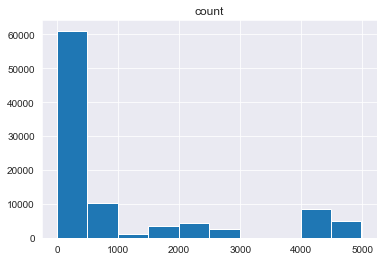

In [144]:
sns.set_style('darkgrid')
new_master.hist()
plt.show()

In [159]:
master_targets = new_master[new_master['count'] > 50]

In [160]:
master_targets.head()

,image,status_code,target,count
0,a01-000u-02-05,ok,a,1950
1,a01-000u-04-02,ok,a,1950
2,a01-000x-01-10,ok,a,1950
3,a01-000x-03-04,ok,a,1950
4,a01-003-00-08,ok,a,1950


In [161]:
len(master_targets['target'].unique())

177

In [198]:
unique_words = list(master_targets['target'].unique())

In [205]:
unique_words_stripped = []
for words in unique_words:
    if words.isalnum() == True:
        unique_words_stripped.append(words)

In [211]:
len(unique_words_stripped)

162

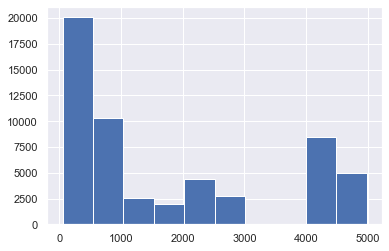

In [162]:
#observing distribution of classes(word images) with greater than 50 files

master_targets['count'].hist()
plt.show()

In [163]:
master_targets.describe()

,count
count,55450.000000
mean,1734.812227
std,1747.939724
min,51.000000
25%,231.000000
50%,820.000000
75%,2741.000000
max,4986.000000


In [164]:
#sort dataframe values by count frequency

master_targets = master_targets.sort_values('count', ascending = False)

In [166]:
master_targets

,image,status_code,target,count
10352,r06-022-05-04,ok,the,4986
6325,b04-000-01-02,ok,the,4986
6309,b03-098-09-02,ok,the,4986
6310,b03-104-01-01,ok,the,4986
6311,b03-104-02-00,ok,the,4986
...,...,...,...,...
59630,c03-007e-01-02,ok,town,51
59629,c03-007d-01-02,ok,town,51
59628,c03-007c-01-01,ok,town,51
49345,g06-042i-03-07,ok,German,51


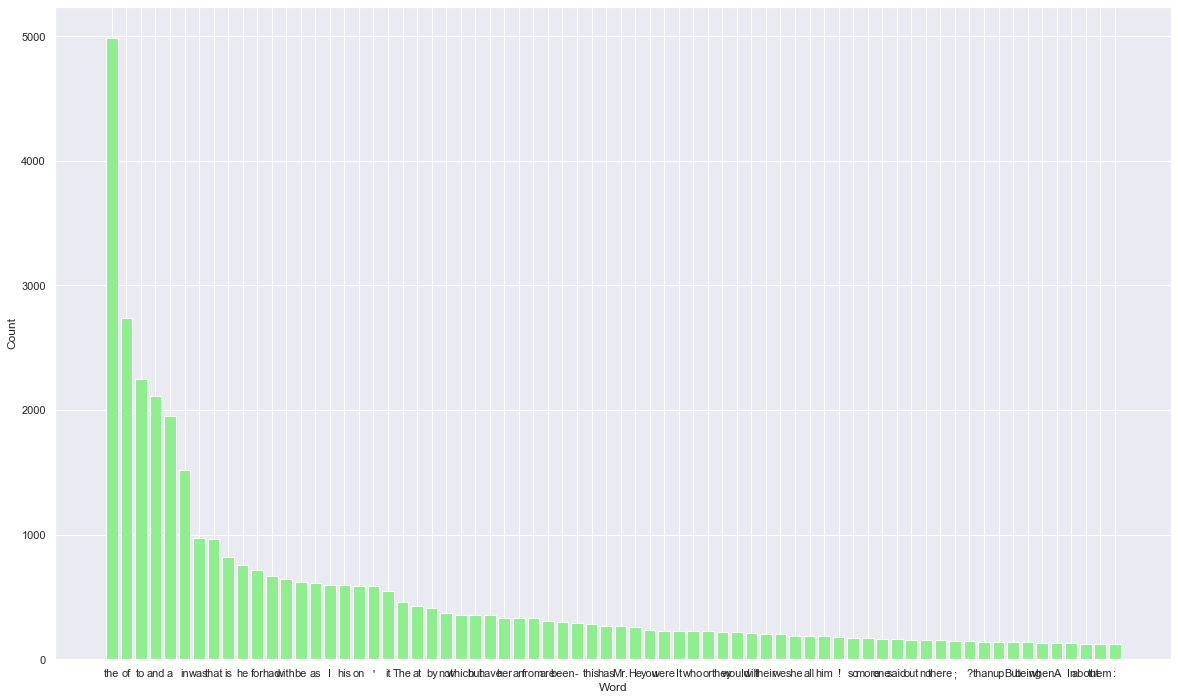

In [197]:
fig, ax = plt.subplots(figsize = (20,12))

sns.set(style = 'darkgrid')


plt.bar(master_targets['target'].unique()[:70], master_targets['count'].unique()[:70], color = 'lightgreen')
plt.xlabel('Word', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

#plt.savefig('train_top10.png', bbox_inches = 'tight')
plt.show()

In [209]:
# for words in master_targets['target']:
    
#     master_targets['target'] = master_targets['target'].map(lambda x: x.drop(r"[!@#$%^&*(),.?"':{}|<>])

KeyError: "['the'] not found in axis"

In [ ]:
# def strip_character(dataCol):
#     r = re.compile(r'[^a-zA-Z !@#$%&*_+-=|\:";<>,./()[\]{}\']')
#     return 

# df[resultCol] = df[dataCol].apply(strip_character)

In [182]:
remove_comma = master_targets[master_targets['target'] == ','].index
remove_period = master_targets[master_targets['target'] == '.'].index
remove_quote = master_targets[master_targets['target'] == '"'].index

In [184]:
master_targets.drop(remove_comma, inplace = True)

In [186]:
master_targets.drop(remove_period, inplace = True)

In [188]:
master_targets.drop(remove_quote, inplace = True)

In [189]:
master_targets.shape

(45919, 4)

In [215]:
train, test = train_test_split(master_targets, test_size = .10)

In [217]:
train.shape

(41327, 4)

In [218]:
test.shape

(4592, 4)

In [238]:
len(test['target'].unique())

174

In [237]:
len(train['target'].unique())

174

## Moving files to new directories with containing unique word classes

In [ ]:
#iterate through list of unique words

#match words to image file rows from dataframe

#move all image files to desired folders containing proper class names

In [ ]:
unique_words_stripped, train df, new_train folder

In [220]:
def word_to_folder(word, df, folder):
    """
    Function receives target word directory, dataframe containing image names, and sub-directory within "../text-recognition" repo
    
    Image files containing word will be moved to the specified folder 
    
    """
    
    new_df = df[df['target'] == word]
    
    the_directories = list(new_df['image'] + '.png')
    full_path = []
    
    for root, dirs, files in os.walk('words_fullset'):
        for name in files:
            if name in the_directories:
                full_path.append(os.path.join(root, name))
                
    split_directories = []
    
    for lists in full_path:
        split_directories.append(lists.split('/'))
        
    indexed_png = []
    
    for img in split_directories:
        indexed_png.append(img[3])
        
    i=0
    for x in full_path:
        shutil.move('../text-recognition/'+f'{x}', '../text-recognition/'+folder+'/'+word+'/'+f'{indexed_png[i]}')
        i+=1
        

In [231]:
word_to_folder('a', train, 'new_train')

In [225]:
def all_words_to_folders(list_of_words, df, folder):
    for word in list_of_words:
        try:
            word_to_folder(word, df, folder)
        except:
            print('failed to execute')
        

In [233]:
all_words_to_folders(unique_words_stripped, train, 'new_train')

In [234]:
all_words_to_folders(unique_words_stripped, test, 'new_test')